# Laboratorium 2

## Konfiguracja

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js
from decimal import Decimal
import random
import math

## Wizualizacja

In [3]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        plt.close()
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

## 1 a)

<IPython.core.display.Javascript object>


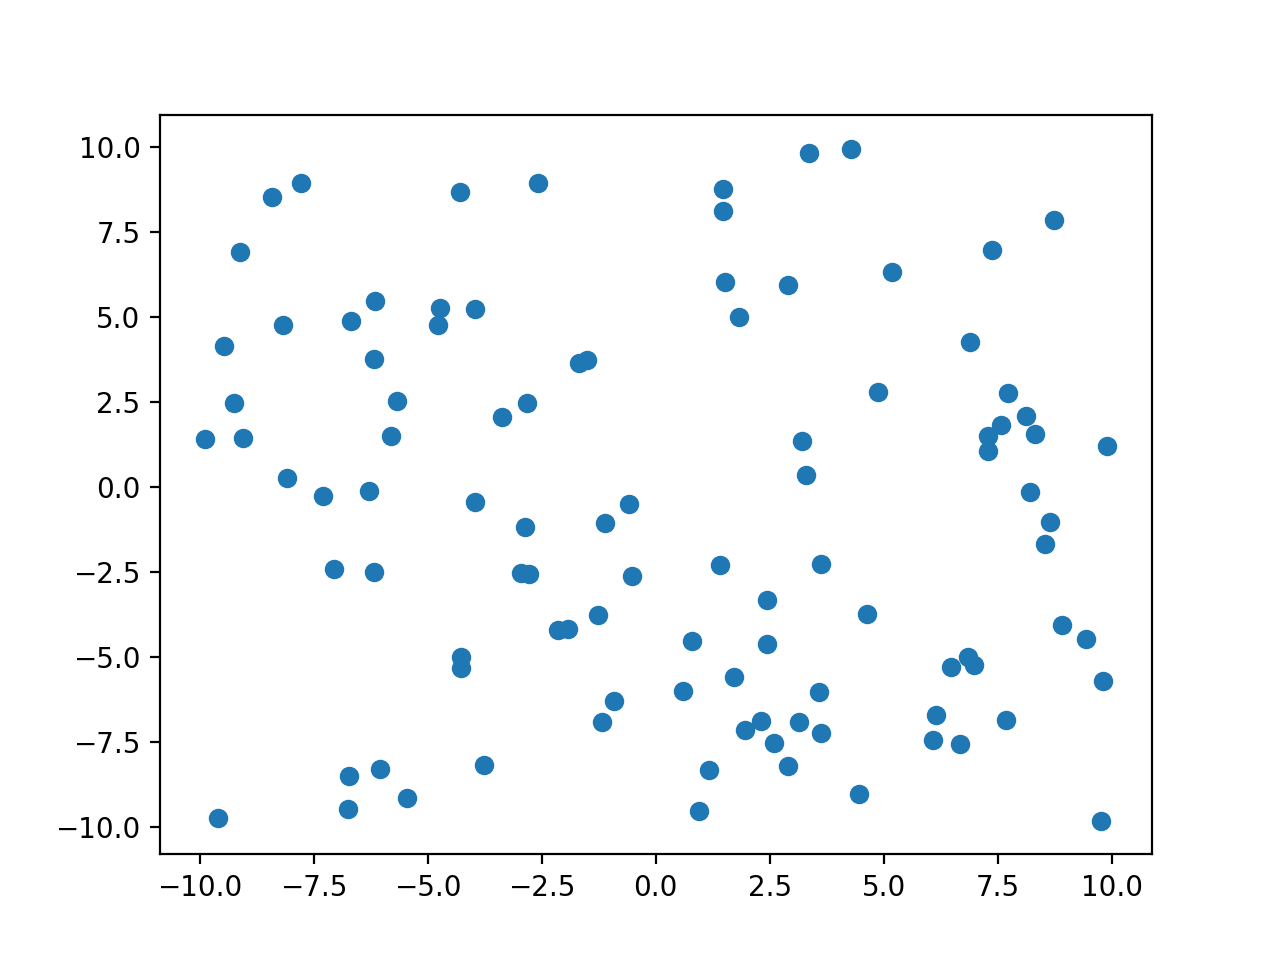

In [11]:
%matplotlib notebook
r = 100  #range of coordinates
n = 100  #number of points

PointsA = []
for x in range(n):
    PointsA.append((random.uniform(-a,a),random.uniform(-a, a)))
    
plot = Plot([PointsCollection(PointsA)])
plot.draw()


## 1 b)

<IPython.core.display.Javascript object>


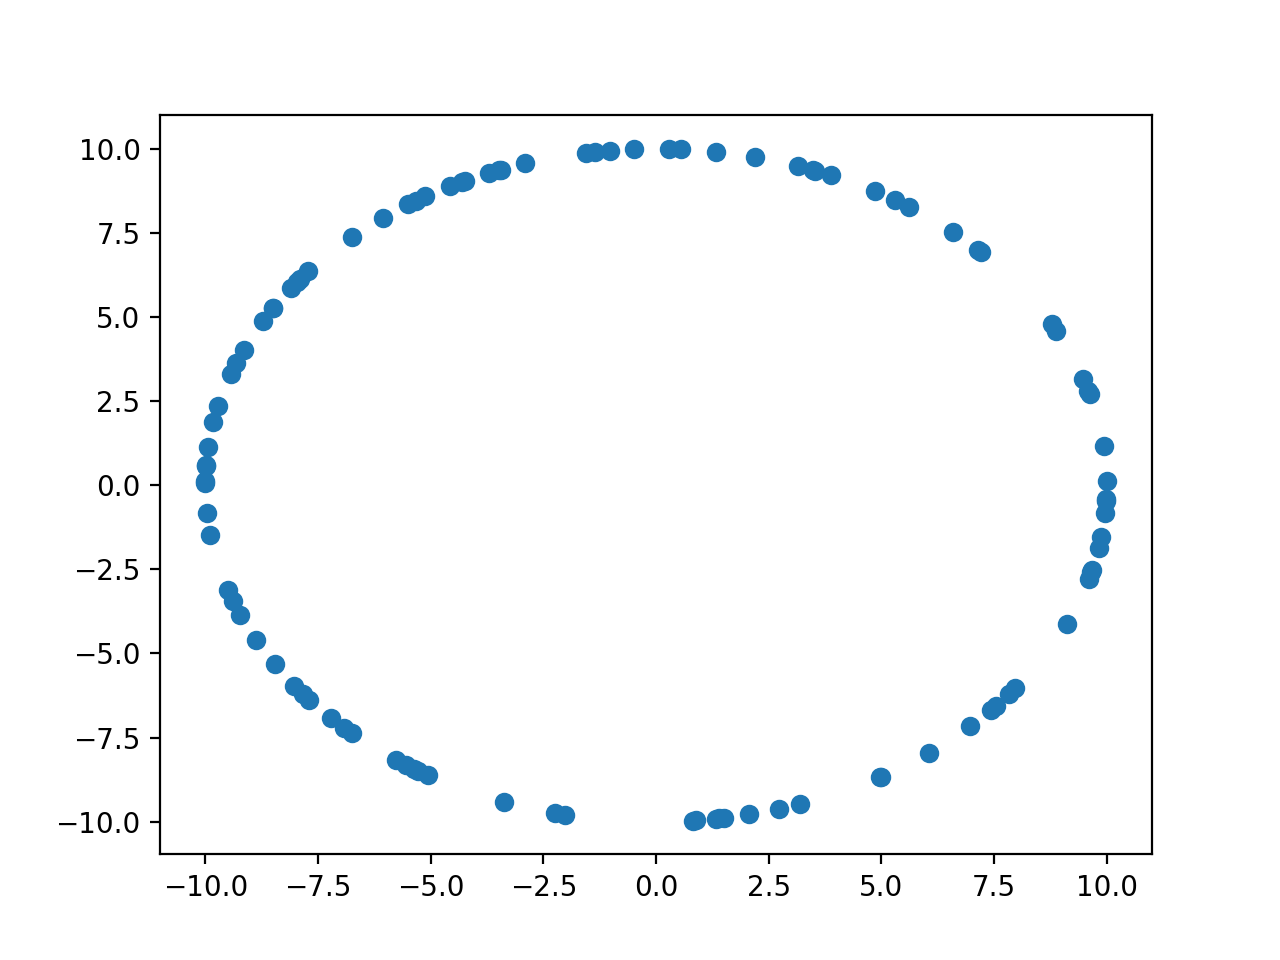

In [12]:
%matplotlib notebook
r = 10     #radius of circle
n = 100    #number of points
o = (0,0)  #centre of circle

Circle = []
for x in range(n):
    t = random.uniform(0, 2*math.pi)
    Circle.append(( r*math.cos(t) + o[0], r*math.sin(t) + o[1]))
    
plot = Plot([PointsCollection(Circle)])
plot.draw()

## 1 c)

<IPython.core.display.Javascript object>


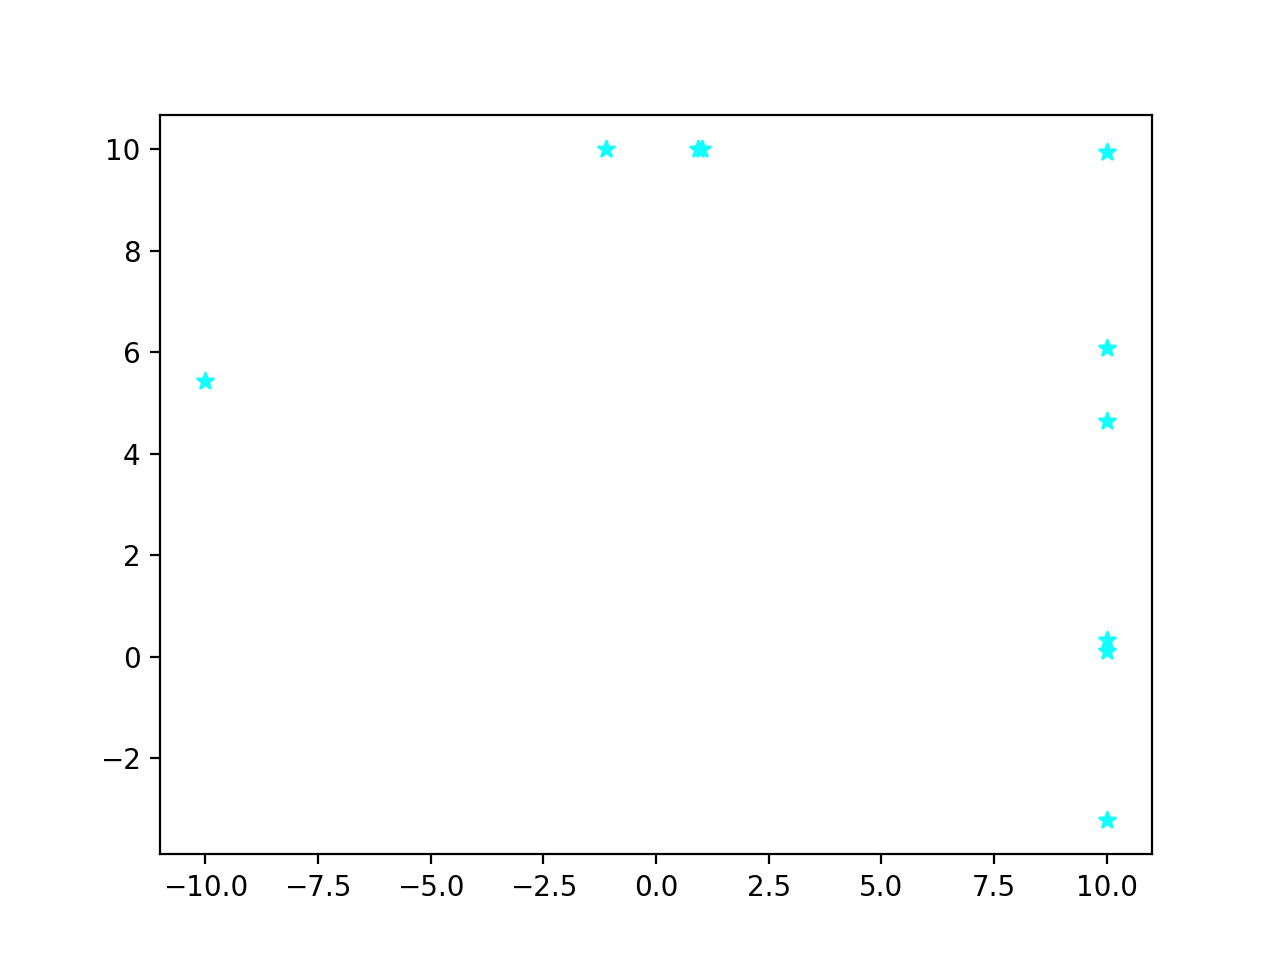

In [17]:
%matplotlib notebook

n = 100.              #number of points
upRight = (10,10)     #coordinates of upper right corner
lowLeft = (-10,-10)   #coordinates of lower left corner

Rectangular = []

def getEdge(edge):
    switcher = {
        1: (lowLeft, (lowLeft[0], upRight[1])),
        2: (lowLeft, (upRight[0], lowLeft[1])),
        3: ((lowLeft[0], upRight[1]), upRight),
        4: ((upRight[0], lowLeft[1]), upRight)
    }
    return switcher.get(edge)

for i in range(n):
    edge = random.randint(1, 4)
    ends = getEdge(edge)
    t = random.uniform(0,1)
    x = (1-t)*ends[0][0] + t*ends[1][0]
    y = (1-t)*ends[0][1] + t*ends[1][1]
    Rectangular.append((x, y))

    
plot = Plot([PointsCollection(Rectangular, color='#11FFFF', marker='*')])
plot.draw()

## 1 d)

<IPython.core.display.Javascript object>


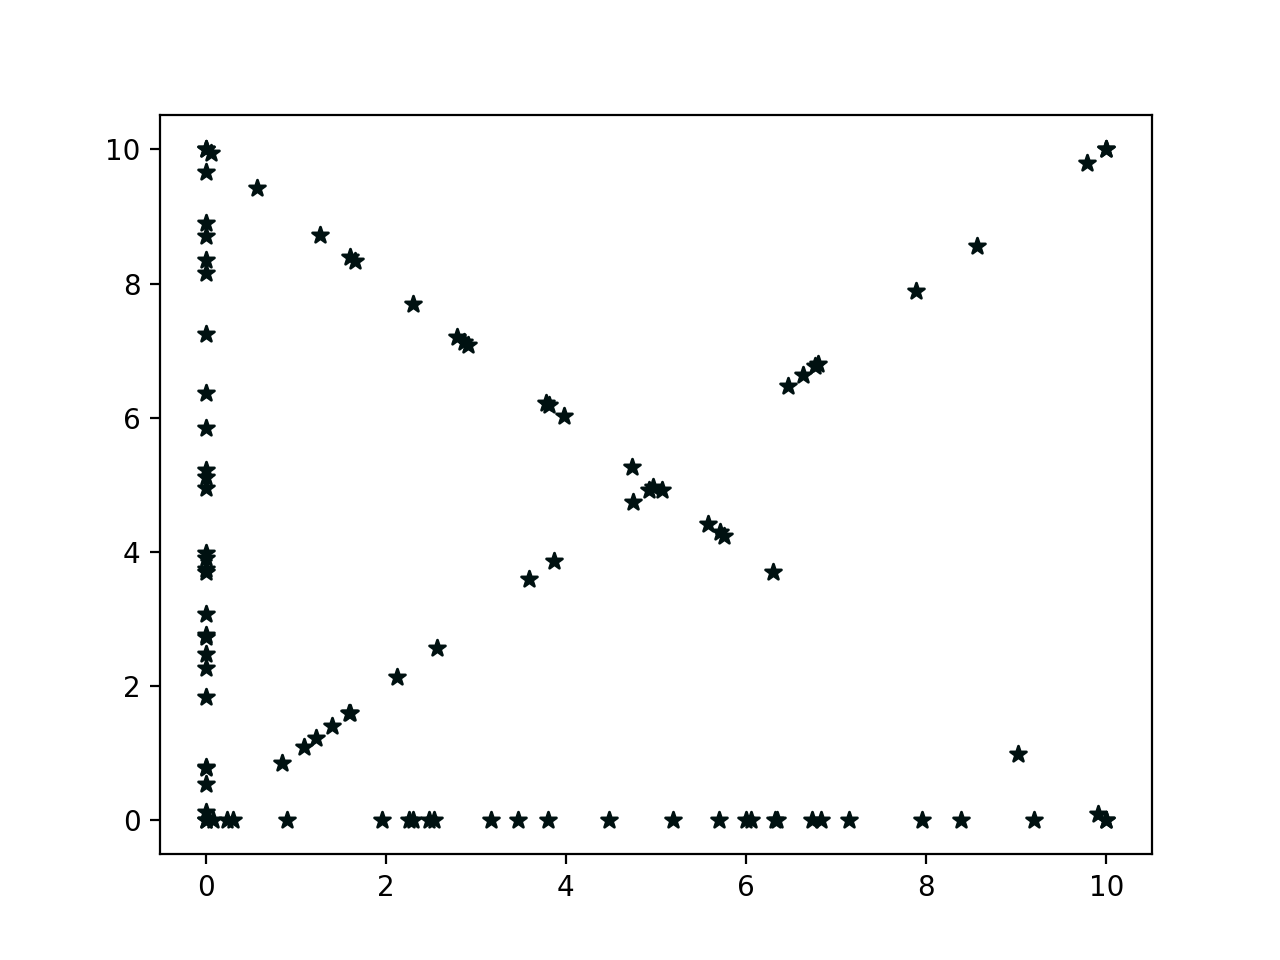

In [5]:
%matplotlib notebook
upRight = (10,10)     #coordinates of upper right corner
lowLeft = (0,0)   #coordinates of lower left corner



Square = []

corn = (lowLeft,upRight)
for i in range(2):
    for j in range(2):
        Square.append((corn[i][j],corn[j][i]))

corn = (0,10)
for i in range(2):
    for j in range(2):
        Square.append((corn[i],corn[j]))

for i in range(25):
    ends = ((0,10), (10,0))
    t = random.uniform(0,1)
    x1 = (1-t)*ends[0][0] + t*0
    y1 = (1-t)*ends[0][1] + t*0
    t = random.uniform(0,1)
    x2= (1-t)*ends[1][0] + t*0
    y2 = (1-t)*ends[1][1] + t*0
    Square.append((x1, y1))
    Square.append((x2, y2))

ends = (((0,0),(10,10)), ((10,0),(0,10)))
for i in range(40):
    t = random.uniform(0,1)
    x = (1-t)*ends[i%2][0][0] + t*ends[i%2][1][0]
    y = (1-t)*ends[i%2][0][1] + t*ends[i%2][1][1]
    Square.append((x, y))
    
plot = Plot([PointsCollection(Square, color='#001111', marker='*')])
plot.draw()